# Analyze inference outputs

### imports and setup

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os


In [25]:
os.chdir('./soundbay')

result_path = "./outputs/Inference_results-2022-11-03_best_manatee_2022_train_val_test_splits_80_20.csv"
os.path.exists(result_path)

True

In [15]:
dataframe = pd.read_csv(result_path)

In [46]:
dataframe

,Selection,View,channel,begin_time,end_time,Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),...,EndMicInWater,filepath,label,call_length,0,1,Unnamed: 24,Unnamed: 25,total bg secs,total call sec
0,2,Spectrogram 1,1,13.317047,14.317047,3000.000,4350.000,0.1964,1350.000,-46.62,...,36.835417,annotations,0,1,0.999997,3.450000e-06,NaN,NaN,12835.0,0.0
1,2,Spectrogram 1,1,14.317047,15.317047,3000.000,4350.000,0.1964,1350.000,-46.62,...,36.835417,annotations,0,1,0.999250,7.496810e-04,NaN,NaN,NaN,NaN
2,2,Spectrogram 1,1,15.317047,16.317047,3000.000,4350.000,0.1964,1350.000,-46.62,...,36.835417,annotations,0,1,1.000000,2.090000e-07,NaN,NaN,NaN,NaN
3,2,Spectrogram 1,1,16.317047,17.317047,3000.000,4350.000,0.1964,1350.000,-46.62,...,36.835417,annotations,0,1,0.996378,3.621760e-03,NaN,NaN,NaN,NaN
4,4,Spectrogram 1,1,19.172220,20.172220,2400.000,3900.000,0.1314,1500.000,-56.70,...,36.835417,annotations,0,1,0.999986,1.450000e-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12830,30,Spectrogram 1,1,276.765877,277.765877,4719.101,6202.247,0.2500,1483.146,-50.43,...,282.054769,annotations,0,1,1.000000,9.930000e-08,NaN,NaN,NaN,NaN
12831,30,Spectrogram 1,1,277.765877,278.765877,4719.101,6202.247,0.2500,1483.146,-50.43,...,282.054769,annotations,0,1,1.000000,3.200000e-08,NaN,NaN,NaN,NaN
12832,30,Spectrogram 1,1,278.765877,279.765877,4719.101,6202.247,0.2500,1483.146,-50.43,...,282.054769,annotations,0,1,0.999990,1.000000e-05,NaN,NaN,NaN,NaN
12833,30,Spectrogram 1,1,279.765877,280.765877,4719.101,6202.247,0.2500,1483.146,-50.43,...,282.054769,annotations,0,1,0.984271,1.572912e-02,NaN,NaN,NaN,NaN


### divide to gt and predictions

In [40]:
label = dataframe['label'].to_numpy()
pred_probs = dataframe[['0','1']].to_numpy()

threshold = 0.9 # change threshold for optimization (was 0.99999)

pred = (pred_probs[:,1]>threshold).astype(int)
dataframe['pred']=pred

In [31]:
class_id = 1
metrics_dict = {
            'global': {'accuracy': metrics.accuracy_score(label, pred),
                       'call_average_precision_macro': np.nanmean([metrics.average_precision_score(
                           label == i, pred_probs[:, i]) for i in range(1, pred_probs.shape[1])]),
                       'bg_average_precision': metrics.average_precision_score(label == 0, pred_probs[:, 0]),
                       'call_f1_macro': metrics.f1_score(label, pred, average='macro',
                                                         labels=list(range(1, pred_probs.shape[1]))),
                       'bg_f1': metrics.f1_score(label == 0, pred == 0),
                       'bg_precision': metrics.precision_score(label == 0, pred == 0),
                       'bg_recall': metrics.recall_score(label == 0, pred == 0),
                       },
            'calls': {'precision': metrics.precision_score(label == class_id, pred == class_id),
                'recall': metrics.recall_score(label == class_id, pred == class_id),
                'f1': metrics.f1_score(label == class_id, pred == class_id),}
            }
metrics_dict 
conf_mat = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

{'global': {'accuracy': 0.9926416912430286,
  'call_average_precision_macro': 0.8722317790777655,
  'bg_average_precision': 0.9999254152013085,
  'call_f1_macro': 0.7946210268948656,
  'bg_f1': 0.9962537351152868,
  'bg_precision': 0.9994183792167507,
  'bg_recall': 0.9931090693538827},
 'calls': {'precision': 0.6770833333333334,
  'recall': 0.9615384615384616,
  'f1': 0.7946210268948656}}

In [86]:
pd.set_option('display.max_columns', None)
dataframe.head()

,Selection,View,channel,begin_time,end_time,Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),Agg Entropy (bits),Center Freq (Hz),PFC Max Freq (Hz),PFC Min Freq (Hz),Max Freq (Hz),Annotation,filename,StartMicInWater,EndMicInWater,filepath,label,call_length,split_type,0,1,pred
0,2,Spectrogram 1,1,13.317046,13.517046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,test,0.213089,0.786911,0
1,2,Spectrogram 1,1,13.517046,13.717046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,test,0.978921,0.021079,0
2,2,Spectrogram 1,1,13.717046,13.917046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,test,0.973380,0.026620,0
3,2,Spectrogram 1,1,13.917046,14.117046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,test,0.970555,0.029445,0
4,2,Spectrogram 1,1,14.117046,14.317046,3000.0,4350.0,0.1964,1350.0,-46.62,1.535,3562.5,3937.5,3375.0,3562.5,Y,211127_0066,13.213609,36.835417,annotations,0,0.2,test,0.976474,0.023526,0


In [63]:
countbyfile = dataframe.groupby('filename')['label'].sum()
files = dataframe['filename'].unique()

print(countbyfile)
print(files)

filename
211127_0066      4
211208_0069      1
211208_0070      3
211208_0072     18
211208_0074     81
211209_0077     45
211210_0079     49
211212_0081     12
211212_0082      8
211213_0083      1
211213_0084      1
211213_0086      8
211220_0089      2
211224_0090      1
211227_0091      0
211227_0093      0
220104_0094     98
220115_0097     39
220118_0098      2
220224_0102    100
220224_0103      4
220224_0104     21
220225_0105    121
220225_0106     16
220225_0108     16
220226_0109     92
220226_0110     14
220226_0111     38
220227_0112    101
220227_0113     30
220227_0114     28
220228_0117     35
220228_0118     25
Name: label, dtype: int64
['211127_0066' '211208_0069' '211208_0070' '211208_0072' '211208_0074'
 '211209_0077' '211210_0079' '211212_0081' '211212_0082' '211213_0083'
 '211213_0084' '211213_0086' '211220_0089' '211224_0090' '211227_0091'
 '211227_0093' '220104_0094' '220115_0097' '220118_0098' '220224_0102'
 '220224_0103' '220224_0104' '220225_0105' '220225_010

<Figure size 1440x360 with 0 Axes>

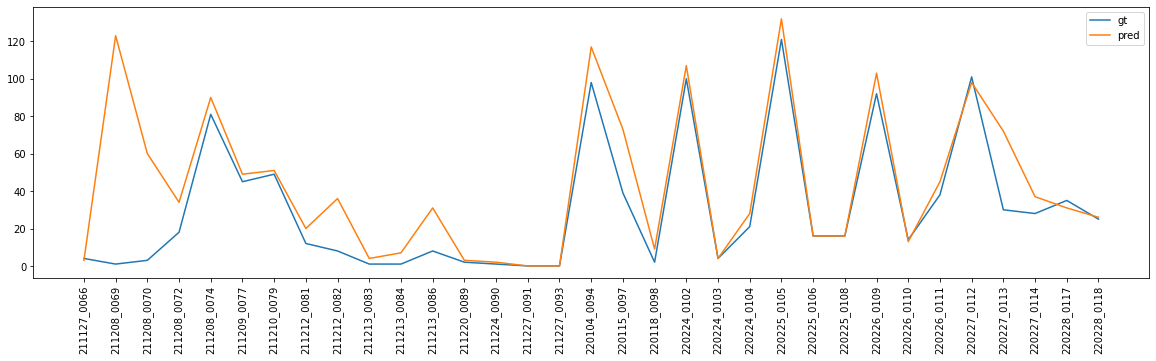

In [89]:
callsbyday = dataframe.groupby(['filename'])['label'].sum().tolist()
callsbydaypred = dataframe.groupby(['filename'])['pred'].sum().tolist()
# df = pd.DataFrame((callsbyday,callsbydaypred), index=dataframe['filename'].unique(), columns=['gt','pred'])
df = pd.DataFrame({'gt':callsbyday, 'pred':callsbydaypred}, index=dataframe['filename'].unique())
plt.figure()
df.plot()
plt.xticks(np.arange(df.index.size),df.index, rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
# plt.tight_layout()
plt.show()


<ipython-input-95-f52973a780ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timeslot'] = pd.qcut(df2['begin_time'], q=10)


<Figure size 1440x360 with 0 Axes>

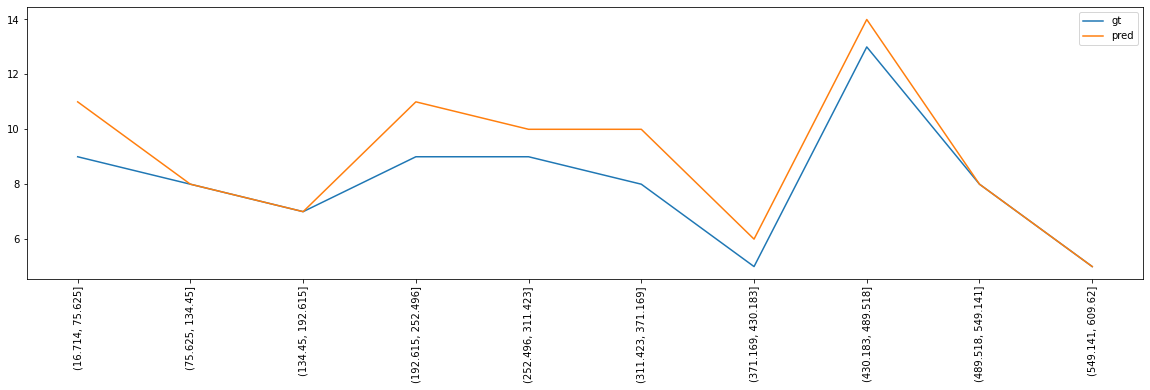

In [95]:
df2 = dataframe.loc[dataframe.filename=='211208_0074']
df2['timeslot'] = pd.qcut(df2['begin_time'], q=10)

callsbytime = df2.groupby(['timeslot'])['label'].sum().tolist()
callsbytimepred = df2.groupby(['timeslot'])['pred'].sum().tolist()
df3 = pd.DataFrame({'gt':callsbytime, 'pred':callsbytimepred}, index=df2['timeslot'].unique())
plt.figure()
df3.plot()
plt.xticks(np.arange(df3.index.size),df3.index, rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
# plt.tight_layout()
plt.show()